# Tarea 06
- David Pilataxi 
- Gr1CC
- 27 de noviembre de 2024

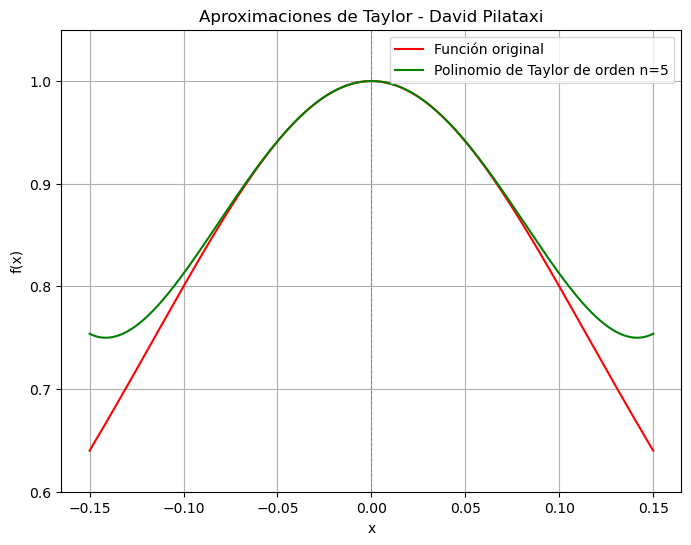

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, factorial, lambdify  # Asegúrate de importar 'lambdify'

# Definimos las variables y la función original
x = symbols('x')
f = 1 / (25 * x**2 + 1)

# Función para calcular el polinomio de Taylor
def taylor_approx(f, x0, n):
    taylor_poly = 0
    for i in range(n + 1):
        term = (diff(f, x, i).subs(x, x0) / factorial(i)) * (x - x0)**i
        taylor_poly += term
    return taylor_poly

# Parámetros
x0 = 0  # Punto de expansión
n = 5   # Orden del polinomio

# Aproximación de Taylor
taylor_poly = taylor_approx(f, x0, n)

# Convertimos la función y el polinomio a una función numérica
f_lambdified = lambdify(x, f, 'numpy')
taylor_lambdified = lambdify(x, taylor_poly, 'numpy')

# Rango para graficar (ajustado para eliminar espacio en blanco)
x_vals = np.linspace(-0.15, 0.15, 500)
f_vals = f_lambdified(x_vals)
taylor_vals = taylor_lambdified(x_vals)

# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label="Función original", color="red")  # Cambiado a rojo
plt.plot(x_vals, taylor_vals, label=f"Polinomio de Taylor de orden n={n}", color="green")  # Cambiado a verde
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.7)

# Ajustamos los límites del eje y
plt.ylim(0.6, 1.05)  # Ajustar los valores según el rango observado

# Título y etiquetas
plt.title("Aproximaciones de Taylor - David Pilataxi")  # Título personalizado
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()



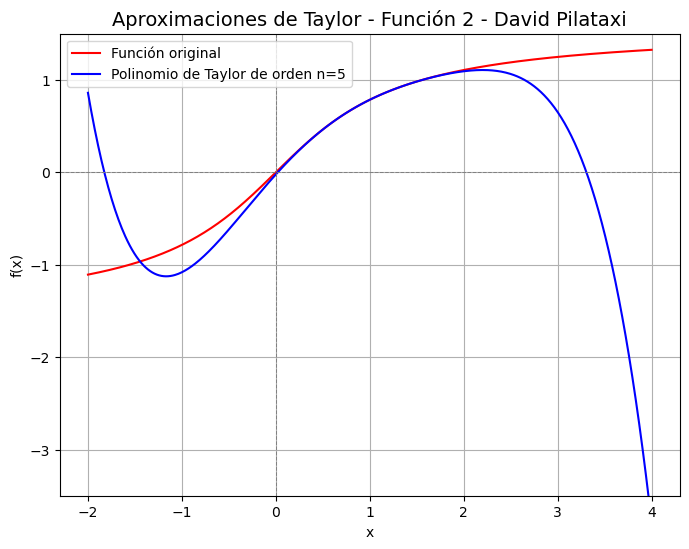

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff, factorial, lambdify, atan  # Asegúrate de importar atan

# Definimos las variables y la función original
x = symbols('x')
f = atan(x)  # Función original

# Función para calcular el polinomio de Taylor
def taylor_approx(f, x0, n):
    taylor_poly = 0
    for i in range(n + 1):
        term = (diff(f, x, i).subs(x, x0) / factorial(i)) * (x - x0)**i
        taylor_poly += term
    return taylor_poly

# Parámetros
x0 = 1  # Punto de expansión
n = 5   # Orden del polinomio

# Aproximación de Taylor
taylor_poly = taylor_approx(f, x0, n)

# Convertimos la función y el polinomio a una función numérica
f_lambdified = lambdify(x, f, 'numpy')
taylor_lambdified = lambdify(x, taylor_poly, 'numpy')

# Rango para graficar
x_vals = np.linspace(-2, 4, 500)
f_vals = f_lambdified(x_vals)
taylor_vals = taylor_lambdified(x_vals)

# Graficamos
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label="Función original", color="red")  # Cambiado a rojo
plt.plot(x_vals, taylor_vals, label=f"Polinomio de Taylor de orden n={n}", color="blue")  # Cambiado a azul
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.7)

# Ajustamos los límites del eje y para que se enfoque en los datos
plt.ylim(-3.5, 1.5)

# Título y etiquetas
plt.title("Aproximaciones de Taylor - Función 2 - David Pilataxi", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()


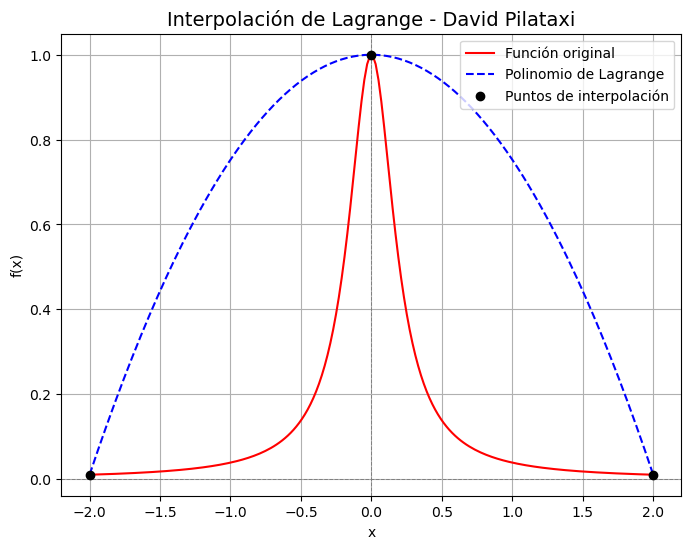

Polinomio de Lagrange:
1.0 - 0.247524752475248*x**2


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand, lambdify

# Definimos los puntos de interpolación
x_points = np.array([-2, 0, 2])  # Puntos dados para interpolar
y_points = 1 / (25 * x_points**2 + 1)  # Valores de f(x) en esos puntos

# Función para calcular el polinomio de Lagrange
def lagrange_interpolation(x_points, y_points):
    x = symbols('x')
    n = len(x_points)
    lagrange_poly = 0
    for i in range(n):
        # Calculamos el término de Lagrange L_i(x)
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        lagrange_poly += L_i * y_points[i]
    return expand(lagrange_poly)

# Calculamos el polinomio de Lagrange
lagrange_poly = lagrange_interpolation(x_points, y_points)

# Convertimos el polinomio a una función numérica
x = symbols('x')
lagrange_func = lambdify(x, lagrange_poly, 'numpy')

# Graficamos la función original y el polinomio de Lagrange
x_vals = np.linspace(-2, 2, 200)
f_vals = 1 / (25 * x_vals**2 + 1)
lagrange_vals = lagrange_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label="Función original", color="red")
plt.plot(x_vals, lagrange_vals, label="Polinomio de Lagrange", color="blue", linestyle="--")
plt.scatter(x_points, y_points, color="black", zorder=5, label="Puntos de interpolación")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.7)

# Título, etiquetas y leyenda
plt.title("Interpolación de Lagrange - David Pilataxi", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Imprimimos el polinomio de Lagrange
print("Polinomio de Lagrange:")
print(lagrange_poly)


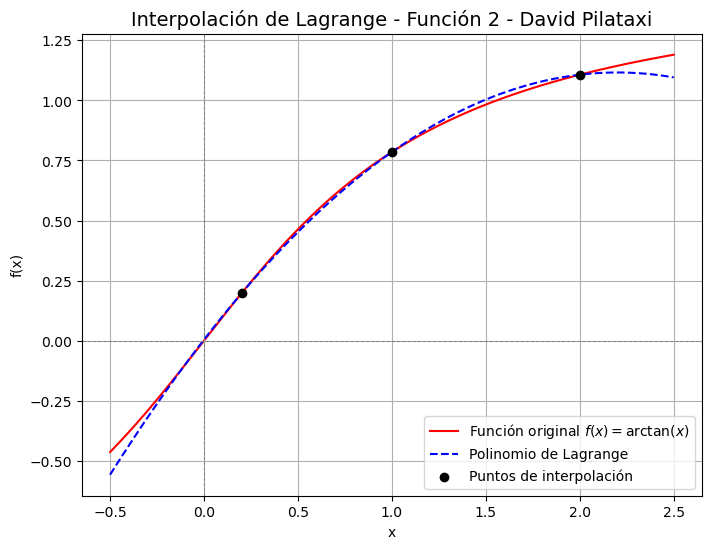

Polinomio de Lagrange:
-0.229584833354343*x**2 + 1.01050505445967*x + 0.00447794229212034


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand, lambdify

# Definimos los puntos de interpolación
x_points = np.array([0.2, 1, 2])  # Puntos representativos seleccionados
y_points = np.arctan(x_points)  # Valores de f(x) en esos puntos

# Función para calcular el polinomio de Lagrange
def lagrange_interpolation(x_points, y_points):
    x = symbols('x')
    n = len(x_points)
    lagrange_poly = 0
    for i in range(n):
        # Calculamos el término de Lagrange L_i(x)
        L_i = 1
        for j in range(n):
            if i != j:
                L_i *= (x - x_points[j]) / (x_points[i] - x_points[j])
        lagrange_poly += L_i * y_points[i]
    return expand(lagrange_poly)

# Calculamos el polinomio de Lagrange
lagrange_poly = lagrange_interpolation(x_points, y_points)

# Convertimos el polinomio a una función numérica
x = symbols('x')
lagrange_func = lambdify(x, lagrange_poly, 'numpy')

# Graficamos la función original y el polinomio de Lagrange
x_vals = np.linspace(-0.5, 2.5, 500)
f_vals = np.arctan(x_vals)  # Función original
lagrange_vals = lagrange_func(x_vals)

plt.figure(figsize=(8, 6))
plt.plot(x_vals, f_vals, label="Función original $f(x) = \\arctan(x)$", color="red")
plt.plot(x_vals, lagrange_vals, label="Polinomio de Lagrange", color="blue", linestyle="--")
plt.scatter(x_points, y_points, color="black", zorder=5, label="Puntos de interpolación")
plt.axhline(0, color="gray", linestyle="--", linewidth=0.7)
plt.axvline(0, color="gray", linestyle="--", linewidth=0.7)

# Título, etiquetas y leyenda
plt.title("Interpolación de Lagrange - Función 2 - David Pilataxi", fontsize=14)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

# Imprimimos el polinomio de Lagrange
print("Polinomio de Lagrange:")
print(lagrange_poly)
